In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

!pip install numpy==1.22.0


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # plotting

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import requests

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 50.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
apache-beam 2.46.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.6 which is incompatible.
chex 0.1.81 requires numpy>=1.25.0, but you have numpy 1.22.0 which is incompatible.
librosa 0.10.0.post2 requires numpy!=1.22.0,!=1.22.1,!=1.22.2,>=1.20.3, but you have numpy 1.22.0 which is incompatible.
momepy 0.6.0 requires shapely>=2, but you have shapely 1.8.5.post1 which is incompatible.
pymc3 3.11.5 requires scipy<1.8.0,>=1.7.3, but you have scipy 1.11.1 which is incompatible.
ydata-profiling 4.3.1 requires scipy<1.11,>=1.4.1, but you have scipy 1.11.1 which is incompatible.


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Getting Data

## Account information

In [2]:
from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
api_key = user_secrets.get_secret("api_key")

account_url = 'https://kr.api.riotgames.com/lol/summoner/v4/summoners/by-name/hide%20on%20bush'
account_dict = requests.get(account_url, params={'api_key':api_key}).json()
account_dict

{'id': 'ghGtk9-R2flpUNmG_5ph1QcXRua-2uwCPBsMw1KrDijYYQ',
 'accountId': 'NZPIj9-FrSFbs9YSz64zn_LrOwzmp227hKGYefcBGBD0',
 'puuid': 'taWqq7Ugqey4TOxCCVCKZgkpNXVwhs_4q_6SXQQNHg8Xg0WUzCD8kVubeYG-0fZ1MAEGlmEUwP3z9g',
 'name': 'Hide on bush',
 'profileIconId': 6,
 'revisionDate': 1690825266283,
 'summonerLevel': 677}

## Mastery Information

| Name                        | Data Type  | Description |
|------------------------------|---------|-----------------------------------------------------------------------------------------------------------------------------------|
| puuid                        | string  | Player Universal Unique Identifier. Exact length of 78 characters. (Encrypted)                             
| championPointsUntilNextLevel | long    | Number of points needed to achieve next level. Zero if player reached maximum champion level for this champion.                   |
| chestGranted                 | boolean | Is chest granted for this champion or not in current season.                                                                      |
| championId                   | long    | Champion ID for this entry.                                                                                                       |
| lastPlayTime                 | long    | Last time this champion was played by this player - in Unix milliseconds time format.                                             |
| championLevel                | int     | Champion level for specified player and champion combination.                                                                     |
| summonerId                   | string  | Summoner ID for this entry. (Encrypted)                                                                                           |
| championPoints               | int     | Total number of champion points for this player and champion combination - they are used to determine championLevel.              |
| championPointsSinceLastLevel | long    | Number of points earned since current level has been achieved.                                                                    |
| tokensEarned                 | int     | The token earned for this champion at the current championLevel. When the championLevel is advanced the tokensEarned resets to 0. |

In [3]:
mastery_url = f"https://kr.api.riotgames.com/lol/champion-mastery/v4/champion-masteries/by-summoner/{account_dict['id']}"
mastery_dict = requests.get(mastery_url, params={'api_key':api_key}).json()
print(f"Records: {len(mastery_dict)}")
mastery_dict[0]

Records: 161


{'puuid': 'taWqq7Ugqey4TOxCCVCKZgkpNXVwhs_4q_6SXQQNHg8Xg0WUzCD8kVubeYG-0fZ1MAEGlmEUwP3z9g',
 'championId': 7,
 'championLevel': 7,
 'championPoints': 529572,
 'lastPlayTime': 1690392131000,
 'championPointsSinceLastLevel': 507972,
 'championPointsUntilNextLevel': 0,
 'chestGranted': True,
 'tokensEarned': 0,
 'summonerId': 'ghGtk9-R2flpUNmG_5ph1QcXRua-2uwCPBsMw1KrDijYYQ'}

In [4]:
mastery_df = pd.DataFrame(mastery_dict)
mastery_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   puuid                         161 non-null    object
 1   championId                    161 non-null    int64 
 2   championLevel                 161 non-null    int64 
 3   championPoints                161 non-null    int64 
 4   lastPlayTime                  161 non-null    int64 
 5   championPointsSinceLastLevel  161 non-null    int64 
 6   championPointsUntilNextLevel  161 non-null    int64 
 7   chestGranted                  161 non-null    bool  
 8   tokensEarned                  161 non-null    int64 
 9   summonerId                    161 non-null    object
dtypes: bool(1), int64(7), object(2)
memory usage: 11.6+ KB


In [5]:
mastery_df.describe()

,championId,championLevel,championPoints,lastPlayTime,championPointsSinceLastLevel,championPointsUntilNextLevel,tokensEarned
count,161.000000,161.000000,161.000000,1.610000e+02,161.000000,161.000000,161.000000
mean,161.527950,4.409938,43683.366460,1.654903e+12,30334.298137,1895.968944,0.285714
std,196.385974,1.963645,70030.595565,4.441128e+10,66080.729868,2498.899887,0.719623
min,1.000000,1.000000,165.000000,1.459097e+12,53.000000,0.000000,0.000000
25%,41.000000,3.000000,6655.000000,1.638615e+12,1894.000000,0.000000,0.000000
50%,92.000000,4.000000,17735.000000,1.673797e+12,4210.000000,268.000000,0.000000
75%,200.000000,6.000000,45702.000000,1.685637e+12,24102.000000,3865.000000,0.000000
max,902.000000,7.000000,529572.000000,1.690825e+12,507972.000000,8775.000000,3.000000


In [6]:
print(f"Unique PuuID: {mastery_df.puuid.nunique()}")
print(f"Unique Summoner ID: {mastery_df.summonerId.nunique()}")
print(f"Mastery PuuID equals Account PuuID: {account_dict['puuid'] == mastery_df.puuid.loc[0]}")
print(f"Mastery Summoner ID equals Account Summoner ID: {account_dict['id'] == mastery_df.summonerId.loc[0]}")

Unique PuuID: 1
Unique Summoner ID: 1
Mastery PuuID equals Account PuuID: True
Mastery Summoner ID equals Account Summoner ID: True


### The code above shows us that both columns "puuId" and "summonerId" can be removed, since they both has 1 unique value (each one with its own) and it's the same value we already have in "account_dict".

In [7]:
mastery_df.drop(['puuid', 'summonerId'], axis=1, inplace=True)

In [8]:
mastery_df.championId.nunique()

161

### As we have 161 records, and 161 unique champion IDs, it means that every single record is equivalent to a champion in League of Legends, as the game itself has exactly 161 champions.

In [9]:
mastery_df # Take a look at our dataframe right now

,championId,championLevel,championPoints,lastPlayTime,championPointsSinceLastLevel,championPointsUntilNextLevel,chestGranted,tokensEarned
0,7,7,529572,1690392131000,507972,0,True,0
1,268,7,290548,1690566830000,268948,0,True,0
2,134,7,262236,1686246568000,240636,0,False,0
3,142,7,256573,1687459207000,234973,0,False,0
4,39,5,243791,1677481577000,222191,0,False,2
...,...,...,...,...,...,...,...,...
156,902,1,912,1682527690000,912,888,False,0
157,74,1,710,1672807717000,710,1090,False,0
158,17,1,338,1490025219000,338,1462,False,0
159,115,1,297,1625502300000,297,1503,False,0


### Here we can see that above 114,829 points, there are 10% of champions played by Faker (approximately 16). Also, the fourth quartile is about the 100,000 points too. And Faker likes to play with champions almost until 300,000 points. There is only one champion above this metric, which has 529,572 points

In [10]:
mastery_df.championPoints.quantile([x / 10 for x in range(0,11)])

0.0       165.0
0.1      2606.0
0.2      5541.0
0.3      8255.0
0.4     14085.0
0.5     17735.0
0.6     26272.0
0.7     38715.0
0.8     54158.0
0.9    114829.0
1.0    529572.0
Name: championPoints, dtype: float64

In [11]:
mastery_df.championPoints.sort_values(ascending=False).head(20)

0     529572
1     290548
2     262236
3     256573
4     243791
5     235911
6     231220
7     229871
8     222314
9     190706
10    168809
11    153418
12    138641
13    118879
14    116745
15    114842
16    114829
17    109465
18     94716
19     92439
Name: championPoints, dtype: int64

<Axes: xlabel='championPoints', ylabel='Count'>

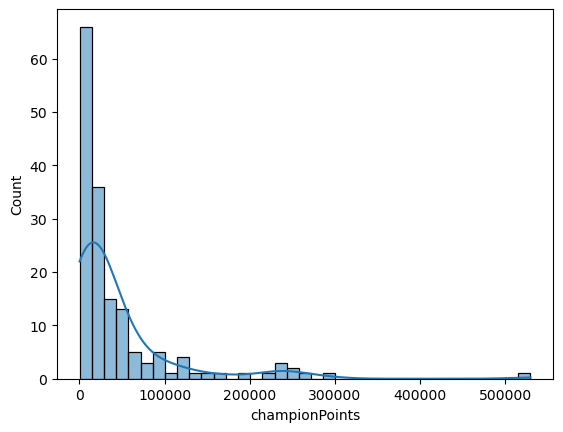

In [12]:
sns.histplot(mastery_df, x='championPoints', kde=True)

<Axes: xlabel='championPoints'>

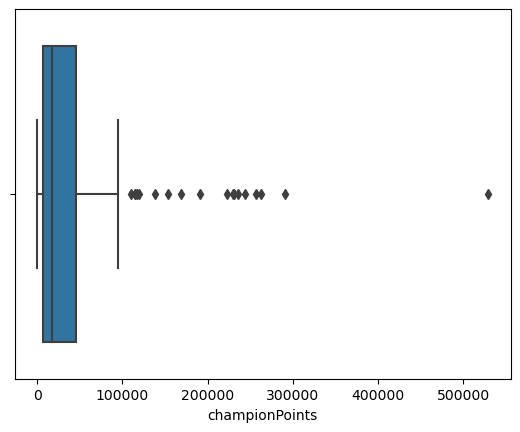

In [13]:
sns.boxplot(mastery_df, x='championPoints')

### Getting the top 10 champions by mastery points.

In [14]:
top10_mastery = mastery_df[['championId', 'championPoints']].sort_values(by='championPoints', ascending=False).head(10)
top10_mastery.rename(columns={'championPoints': 'Top 10'}, inplace=True)
top10_mastery

,championId,Top 10
0,7,529572
1,268,290548
2,134,262236
3,142,256573
4,39,243791
5,517,235911
6,236,231220
7,84,229871
8,13,222314
9,157,190706


### Getting the bottom 10 champions by mastery points.

In [15]:
bottom10_mastery = mastery_df[['championId', 'championPoints']].sort_values(by='championPoints').head(10)
bottom10_mastery.rename(columns={'championPoints': 'Bottom 10'}, inplace=True)
bottom10_mastery

,championId,Bottom 10
160,83,165
159,115,297
158,17,338
157,74,710
156,902,912
155,40,930
154,350,1249
153,200,1586
152,119,1647
151,19,1656


### Converting "lastPlayTime" column to datetime type.

In [16]:
import datetime

mastery_df.lastPlayTime = mastery_df.lastPlayTime.apply(lambda x: datetime.date.fromtimestamp(x/1000))
mastery_df.head()

,championId,championLevel,championPoints,lastPlayTime,championPointsSinceLastLevel,championPointsUntilNextLevel,chestGranted,tokensEarned
0,7,7,529572,2023-07-26,507972,0,True,0
1,268,7,290548,2023-07-28,268948,0,True,0
2,134,7,262236,2023-06-08,240636,0,False,0
3,142,7,256573,2023-06-22,234973,0,False,0
4,39,5,243791,2023-02-27,222191,0,False,2


### Getting the bottom 10 champions by last time played.

In [17]:
bottom10_last_played = mastery_df.sort_values(by='lastPlayTime').head(10)[['championId', 'lastPlayTime']]
bottom10_last_played

,championId,lastPlayTime
147,33,2016-03-27
160,83,2016-09-25
127,143,2017-02-04
158,17,2017-03-20
124,63,2017-07-19
140,420,2018-03-15
141,37,2019-06-18
96,6,2019-09-22
151,19,2019-11-11
146,54,2020-05-27


### In order to obtain the recently top 10 most played champions, we need to cross the data and get the most recent matches. Just by sorting the "lastPlayTime" column and getting the most recent played champions, we can't know if Faker likes to play with that champion or if it was just one time he picked that champion in a month for example.

### I decided to take 1 month of matches to get the top played champions, so first we need to:
* Get all match IDs for the period of one month before actual date
* Search the champion played by Faker in each of the matches
* Count values

Since the request to get matches can only return 100 match IDs, and considering that the minimum of a match time is 15 minutes, Faker could play 4 matches in an hour, and the maximum of 18 hours a day (considering sleeping 6 hours and playing ininterruptely). So one day gives us 72 match IDs.
Riot API has a limit of 100 every 2 minutes, which gives one request in 0,84 seconds. So I'll create a loop to request 100 matches each 0,84 second to get matches for each one of the 30 days.

In [18]:
from time import sleep

timestamps = [round(datetime.datetime.timestamp(datetime.datetime.now().replace(hour=0, minute=0, second=0) - datetime.timedelta(days=x)))
              for x in range(1,31)]
puuid = account_dict['puuid']
matches_dict = {}

for i in range(0,len(timestamps)-1):
    matches_url = f'https://asia.api.riotgames.com/lol/match/v5/matches/by-puuid/{puuid}/ids'
    matches_list = requests.get(matches_url, params={'api_key':api_key,
                                                     'start':0, 'count':100,
                                                     'startTime':timestamps[i+1],
                                                     'endTime':timestamps[i]}
                               ).json()
    matches_dict[datetime.date.fromtimestamp(timestamps[i]).strftime('%Y-%m-%d')] = matches_list
    sleep(0.85)

In [19]:
matches_df = pd.DataFrame(dict([(k,pd.Series(v, dtype=np.str_)) for k,v in matches_dict.items()]))
matches_df.dropna(axis=1, how='all')

,2023-07-30,2023-07-29,2023-07-27,2023-07-26,2023-07-25,2023-07-24,2023-07-23,2023-07-22,2023-07-19,2023-07-02
0,KR_6621212411,KR_6620398592,KR_6616698164,KR_6614934434,KR_6613141064,KR_6611136580,KR_6608436275,KR_6606323993,KR_6599574607,KR_6571202211
1,NaN,NaN,KR_6616656449,KR_6614905299,KR_6613114174,KR_6611097170,KR_6608392517,KR_6606298094,KR_6599546079,KR_6571172707
2,NaN,NaN,KR_6616625284,KR_6614838753,KR_6613088042,KR_6611068315,KR_6608324402,KR_6606215621,KR_6599510179,KR_6571144034
3,NaN,NaN,NaN,KR_6614805566,KR_6613056196,KR_6611042048,KR_6608261508,KR_6606190659,KR_6599472699,KR_6571090546
4,NaN,NaN,NaN,KR_6614712388,KR_6613031306,KR_6611004334,KR_6607745524,KR_6605922544,NaN,KR_6571041847
5,NaN,NaN,NaN,KR_6614643048,KR_6613005664,KR_6610443687,KR_6607698299,KR_6605859896,NaN,KR_6571015162
6,NaN,NaN,NaN,KR_6614565513,KR_6612479345,KR_6610392315,KR_6607649535,KR_6605803464,NaN,KR_6570953367
7,NaN,NaN,NaN,NaN,KR_6612415857,KR_6610335334,KR_6607610246,KR_6605719578,NaN,KR_6569899401
8,NaN,NaN,NaN,NaN,NaN,NaN,KR_6607568579,KR_6605657968,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,KR_6607514923,NaN,NaN,NaN


### As we can see from the code above, from 30 days, Faker played only 9. In order to obtain more information, I'll get the matches from 2022, and 2023

In [20]:
from time import sleep

timestamps = [round(datetime.datetime.timestamp(datetime.datetime(2022, 1, 1) + datetime.timedelta(days=x)))
              for x in range(0,366)]
puuid = account_dict['puuid']
matches_dict = {}

for i in range(0,len(timestamps)-1):
    matches_url = f'https://asia.api.riotgames.com/lol/match/v5/matches/by-puuid/{puuid}/ids'
    matches_list = requests.get(matches_url, params={'api_key':api_key,
                                                     'start':0, 'count':100,
                                                     'startTime':timestamps[i],
                                                     'endTime':timestamps[i+1]}
                               ).json()
    if matches_list:
        matches_dict[datetime.date.fromtimestamp(timestamps[i]).strftime('%Y-%m-%d')] = matches_list
        print(matches_dict)
    sleep(0.85)

{'2022-12-09': ['KR_6251632647', 'KR_6251579347', 'KR_6251530557', 'KR_6251457820', 'KR_6251138589', 'KR_6251041327']}
{'2022-12-09': ['KR_6251632647', 'KR_6251579347', 'KR_6251530557', 'KR_6251457820', 'KR_6251138589', 'KR_6251041327'], '2022-12-10': ['KR_6253538719', 'KR_6253477955', 'KR_6253442495', 'KR_6253349063', 'KR_6253267509', 'KR_6252888953', 'KR_6252809226', 'KR_6252696933']}
{'2022-12-09': ['KR_6251632647', 'KR_6251579347', 'KR_6251530557', 'KR_6251457820', 'KR_6251138589', 'KR_6251041327'], '2022-12-10': ['KR_6253538719', 'KR_6253477955', 'KR_6253442495', 'KR_6253349063', 'KR_6253267509', 'KR_6252888953', 'KR_6252809226', 'KR_6252696933'], '2022-12-14': ['KR_6259728896', 'KR_6259707527']}
{'2022-12-09': ['KR_6251632647', 'KR_6251579347', 'KR_6251530557', 'KR_6251457820', 'KR_6251138589', 'KR_6251041327'], '2022-12-10': ['KR_6253538719', 'KR_6253477955', 'KR_6253442495', 'KR_6253349063', 'KR_6253267509', 'KR_6252888953', 'KR_6252809226', 'KR_6252696933'], '2022-12-14': ['KR

In [21]:
matches_df_2022 = pd.DataFrame(dict([(k,pd.Series(v, dtype=np.str_)) for k,v in matches_dict.items()]))
matches_df_2022

,2022-12-09,2022-12-10,2022-12-14,2022-12-15,2022-12-19,2022-12-21,2022-12-23,2022-12-24,2022-12-26,2022-12-27,2022-12-28,2022-12-29
0,KR_6251632647,KR_6253538719,KR_6259728896,KR_6261112670,KR_6267454026,KR_6270843940,KR_6273797671,KR_6274809460,KR_6278487755,KR_6279823690,KR_6281220076,KR_6282681312
1,KR_6251579347,KR_6253477955,KR_6259707527,KR_6260705357,NaN,KR_6270834267,KR_6273767956,NaN,KR_6278400303,KR_6279785778,KR_6281178908,KR_6282635467
2,KR_6251530557,KR_6253442495,NaN,KR_6260520425,NaN,KR_6270803963,KR_6273729462,NaN,KR_6278356395,KR_6279760232,KR_6281150193,KR_6282573408
3,KR_6251457820,KR_6253349063,NaN,KR_6260451599,NaN,KR_6270798084,KR_6273677061,NaN,NaN,KR_6279700584,KR_6281113408,KR_6282510519
4,KR_6251138589,KR_6253267509,NaN,KR_6260232618,NaN,KR_6270765009,NaN,NaN,NaN,KR_6279460978,KR_6281041735,KR_6282463661
5,KR_6251041327,KR_6252888953,NaN,KR_6260202287,NaN,KR_6270695647,NaN,NaN,NaN,KR_6279030605,NaN,KR_6282272964
6,NaN,KR_6252809226,NaN,NaN,NaN,KR_6269775290,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,KR_6252696933,NaN,NaN,NaN,KR_6269705579,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,KR_6269663265,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,KR_6269622602,NaN,NaN,NaN,NaN,NaN,NaN


#### ****Today's date 2023-07-31**

In [22]:
timestamps = [round(datetime.datetime.timestamp(datetime.datetime(2023, 1, 1) + datetime.timedelta(days=x)))
              for x in range(0, (datetime.datetime.now().date() - datetime.date(2023, 1, 1)).days)]
puuid = account_dict['puuid']
matches_dict = {}

for i in range(0,len(timestamps)-1):
    matches_url = f'https://asia.api.riotgames.com/lol/match/v5/matches/by-puuid/{puuid}/ids'
    matches_list = requests.get(matches_url, params={'api_key':api_key,
                                                     'start':0, 'count':100,
                                                     'startTime':timestamps[i],
                                                     'endTime':timestamps[i+1]}
                               ).json()
    if matches_list:
        parsed_data = datetime.date.fromtimestamp(timestamps[i]).strftime('%Y-%m-%d')
        matches_dict[parsed_data] = matches_list
        print(parsed_data, matches_dict[parsed_data])
    sleep(0.85)

2023-01-03 ['KR_6290624345', 'KR_6290584379', 'KR_6290527117', 'KR_6290116435', 'KR_6290043959', 'KR_6289987499', 'KR_6289933423', 'KR_6289901597']
2023-01-04 ['KR_6291063816', 'KR_6291036227', 'KR_6291004490', 'KR_6290975188', 'KR_6290929304']
2023-01-05 ['KR_6293230720', 'KR_6293166161']
2023-01-06 ['KR_6294975659', 'KR_6294927365', 'KR_6294863912', 'KR_6294785551', 'KR_6294698576']
2023-01-07 ['KR_6296748980', 'KR_6296709189', 'KR_6296647534', 'KR_6296591513', 'KR_6296494679']
2023-01-08 ['KR_6298621005', 'KR_6298575618', 'KR_6298542759', 'KR_6298516165', 'KR_6298406151', 'KR_6298154609']
2023-01-09 ['KR_6299986385', 'KR_6299951798', 'KR_6299911495', 'KR_6299844230', 'KR_6299801137']
2023-01-11 ['KR_6302960517', 'KR_6302844642', 'KR_6302807218']
2023-01-12 ['KR_6304553977', 'KR_6304505438', 'KR_6304448571', 'KR_6304399402', 'KR_6304103427', 'KR_6304011785', 'KR_6303941000', 'KR_6303899124', 'KR_6303840185', 'KR_6303777055']
2023-01-13 ['KR_6304952140']
2023-01-14 ['KR_6308555434', '

In [23]:
matches_df_jan_to_jul_2023 = pd.DataFrame(dict([(k,pd.Series(v, dtype=np.str_)) for k,v in matches_dict.items()]))
matches_df_jan_to_jul_2023

,2023-01-03,2023-01-04,2023-01-05,2023-01-06,2023-01-07,2023-01-08,2023-01-09,2023-01-11,2023-01-12,2023-01-13,...,2023-07-01,2023-07-18,2023-07-21,2023-07-22,2023-07-23,2023-07-24,2023-07-25,2023-07-26,2023-07-28,2023-07-29
0,KR_6290624345,KR_6291063816,KR_6293230720,KR_6294975659,KR_6296748980,KR_6298621005,KR_6299986385,KR_6302960517,KR_6304553977,KR_6304952140,...,KR_6571202211,KR_6599574607,KR_6606323993,KR_6608436275,KR_6611136580,KR_6613141064,KR_6614934434,KR_6616698164,KR_6620398592,KR_6621212411
1,KR_6290584379,KR_6291036227,KR_6293166161,KR_6294927365,KR_6296709189,KR_6298575618,KR_6299951798,KR_6302844642,KR_6304505438,NaN,...,KR_6571172707,KR_6599546079,KR_6606298094,KR_6608392517,KR_6611097170,KR_6613114174,KR_6614905299,KR_6616656449,NaN,NaN
2,KR_6290527117,KR_6291004490,NaN,KR_6294863912,KR_6296647534,KR_6298542759,KR_6299911495,KR_6302807218,KR_6304448571,NaN,...,KR_6571144034,KR_6599510179,KR_6606215621,KR_6608324402,KR_6611068315,KR_6613088042,KR_6614838753,KR_6616625284,NaN,NaN
3,KR_6290116435,KR_6290975188,NaN,KR_6294785551,KR_6296591513,KR_6298516165,KR_6299844230,NaN,KR_6304399402,NaN,...,KR_6571090546,KR_6599472699,KR_6606190659,KR_6608261508,KR_6611042048,KR_6613056196,KR_6614805566,NaN,NaN,NaN
4,KR_6290043959,KR_6290929304,NaN,KR_6294698576,KR_6296494679,KR_6298406151,KR_6299801137,NaN,KR_6304103427,NaN,...,KR_6571041847,NaN,KR_6605922544,KR_6607745524,KR_6611004334,KR_6613031306,KR_6614712388,NaN,NaN,NaN
5,KR_6289987499,NaN,NaN,NaN,NaN,KR_6298154609,NaN,NaN,KR_6304011785,NaN,...,KR_6571015162,NaN,KR_6605859896,KR_6607698299,KR_6610443687,KR_6613005664,KR_6614643048,NaN,NaN,NaN
6,KR_6289933423,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KR_6303941000,NaN,...,KR_6570953367,NaN,KR_6605803464,KR_6607649535,KR_6610392315,KR_6612479345,KR_6614565513,NaN,NaN,NaN
7,KR_6289901597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KR_6303899124,NaN,...,KR_6569899401,NaN,KR_6605719578,KR_6607610246,KR_6610335334,KR_6612415857,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KR_6303840185,NaN,...,NaN,NaN,KR_6605657968,KR_6607568579,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KR_6303777055,NaN,...,NaN,NaN,NaN,KR_6607514923,NaN,NaN,NaN,NaN,NaN,NaN


### As we can see below, either Faker played only in december or Riot API has a fail for 2022.

In [24]:
matches_df_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   2022-12-09  6 non-null      object
 1   2022-12-10  8 non-null      object
 2   2022-12-14  2 non-null      object
 3   2022-12-15  6 non-null      object
 4   2022-12-19  1 non-null      object
 5   2022-12-21  10 non-null     object
 6   2022-12-23  4 non-null      object
 7   2022-12-24  1 non-null      object
 8   2022-12-26  3 non-null      object
 9   2022-12-27  6 non-null      object
 10  2022-12-28  5 non-null      object
 11  2022-12-29  6 non-null      object
dtypes: object(12)
memory usage: 1.1+ KB


In [25]:
matches_df_jan_to_jul_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Columns: 123 entries, 2023-01-03 to 2023-07-29
dtypes: object(123)
memory usage: 16.5+ KB


In [26]:
matches_dec_2022_to_jul_2023 = matches_df_2022.join(matches_df_jan_to_jul_2023)
matches_dec_2022_to_jul_2023

,2022-12-09,2022-12-10,2022-12-14,2022-12-15,2022-12-19,2022-12-21,2022-12-23,2022-12-24,2022-12-26,2022-12-27,...,2023-07-01,2023-07-18,2023-07-21,2023-07-22,2023-07-23,2023-07-24,2023-07-25,2023-07-26,2023-07-28,2023-07-29
0,KR_6251632647,KR_6253538719,KR_6259728896,KR_6261112670,KR_6267454026,KR_6270843940,KR_6273797671,KR_6274809460,KR_6278487755,KR_6279823690,...,KR_6571202211,KR_6599574607,KR_6606323993,KR_6608436275,KR_6611136580,KR_6613141064,KR_6614934434,KR_6616698164,KR_6620398592,KR_6621212411
1,KR_6251579347,KR_6253477955,KR_6259707527,KR_6260705357,NaN,KR_6270834267,KR_6273767956,NaN,KR_6278400303,KR_6279785778,...,KR_6571172707,KR_6599546079,KR_6606298094,KR_6608392517,KR_6611097170,KR_6613114174,KR_6614905299,KR_6616656449,NaN,NaN
2,KR_6251530557,KR_6253442495,NaN,KR_6260520425,NaN,KR_6270803963,KR_6273729462,NaN,KR_6278356395,KR_6279760232,...,KR_6571144034,KR_6599510179,KR_6606215621,KR_6608324402,KR_6611068315,KR_6613088042,KR_6614838753,KR_6616625284,NaN,NaN
3,KR_6251457820,KR_6253349063,NaN,KR_6260451599,NaN,KR_6270798084,KR_6273677061,NaN,NaN,KR_6279700584,...,KR_6571090546,KR_6599472699,KR_6606190659,KR_6608261508,KR_6611042048,KR_6613056196,KR_6614805566,NaN,NaN,NaN
4,KR_6251138589,KR_6253267509,NaN,KR_6260232618,NaN,KR_6270765009,NaN,NaN,NaN,KR_6279460978,...,KR_6571041847,NaN,KR_6605922544,KR_6607745524,KR_6611004334,KR_6613031306,KR_6614712388,NaN,NaN,NaN
5,KR_6251041327,KR_6252888953,NaN,KR_6260202287,NaN,KR_6270695647,NaN,NaN,NaN,KR_6279030605,...,KR_6571015162,NaN,KR_6605859896,KR_6607698299,KR_6610443687,KR_6613005664,KR_6614643048,NaN,NaN,NaN
6,NaN,KR_6252809226,NaN,NaN,NaN,KR_6269775290,NaN,NaN,NaN,NaN,...,KR_6570953367,NaN,KR_6605803464,KR_6607649535,KR_6610392315,KR_6612479345,KR_6614565513,NaN,NaN,NaN
7,NaN,KR_6252696933,NaN,NaN,NaN,KR_6269705579,NaN,NaN,NaN,NaN,...,KR_6569899401,NaN,KR_6605719578,KR_6607610246,KR_6610335334,KR_6612415857,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,KR_6269663265,NaN,NaN,NaN,NaN,...,NaN,NaN,KR_6605657968,KR_6607568579,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,KR_6269622602,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,KR_6607514923,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
matches_dec_2022_to_jul_2023.to_csv('matches_dec_2022_to_jul_2023.csv', index=False)

## This analysis showed the top and bottom 10 champions of Faker consdering the mastery points, and it also resulted in two dataframes of matches played by Faker in 2022 and January to July 2023. I'll continue this analysis in other notebook, to explore the matches itself.

## Thank you for reading it. Please make suggestions and feel free to ask any questions.